<a href="https://colab.research.google.com/github/basharbd/Human-Action-Recognition/blob/main/Copy_of_Final_ucf_part_datasetu_video_classifier_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Classifier Using CNN and RNN


# Directory Display

In [ ]:
import os
print(os.getcwd())


/content



# Environment Setup And Library Imports


In [ ]:
# Install TensorFlow docs utilities, needed for specific tutorial functions or visualizations
#!pip install git+https://github.com/tensorflow/docs

In [ ]:
# Environment Setup: Install required packages
!pip install tensorflow-docs imutils     # to make basic image processing functions

# Import libraries
from tensorflow_docs.vis import embed    # embedding visualizations in TensorFlow documentation
from tensorflow import keras             # High-level API for building and training deep learning models
from imutils import paths                # functions to handle file paths easily

import matplotlib.pyplot as plt          # plotting and visualizing data
import tensorflow as tf                  # Core library for machine learning and deep learning
import pandas as pd                      # Data manipulation and analysis library
import numpy as np                       # Library for numerical computations
import imageio                           # Library for reading and writing image data
import cv2                               # (OpenCV): Library for computer vision tasks
import os                                # functions to interact with the operating system

# Additional code can follow here...


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 3.8 MB/s eta 0:00:00
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=97410bd35fb7cd38bd33e9ef3e2402a3d694e984e40c4400a0cbfaed4f31b61a
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils



# GPU configuration



In [ ]:
# List Available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# checks if there are any GPUs available
if gpus:
  try:
    # Set Virtual Device Configuration
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])    # limit the GPU memory usage to 5120 MB (5 GB) prevent the GPU from being fully occupied by a single process, allowing other processes to use the remaining GPU memory
    # Handle Runtime Errors
  except RuntimeError as e:
    print(e)                                                                               # (e.g., if the GPU is already in use or if the configuration cannot be set), the error message is printed

# Preparing Train Data

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify the correct dataset path
dataset_path = '/content/drive/My Drive/datasetu/train'  # Adjust this path if necessary

# List all categories (subdirectories) in the dataset path
categories = os.listdir(dataset_path)

rooms = []

# Iterate over each category (subdirectory)
for item in categories:
    # Get all the file names within the current category
    all_rooms = os.listdir(os.path.join(dataset_path, item))

    # Add them to the list
    for room in all_rooms:
        rooms.append((item, os.path.join(dataset_path, item, room)))

# Build a dataframe
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

Mounted at /content/drive
      tag                                         video_name
0  Biking  /content/drive/My Drive/datasetu/train/Biking/...
1  Biking  /content/drive/My Drive/datasetu/train/Biking/...
2  Biking  /content/drive/My Drive/datasetu/train/Biking/...
3  Biking  /content/drive/My Drive/datasetu/train/Biking/...
4  Biking  /content/drive/My Drive/datasetu/train/Biking/...
            tag                                         video_name
426  IceDancing  /content/drive/My Drive/datasetu/train/IceDanc...
427  IceDancing  /content/drive/My Drive/datasetu/train/IceDanc...
428  IceDancing  /content/drive/My Drive/datasetu/train/IceDanc...
429  IceDancing  /content/drive/My Drive/datasetu/train/IceDanc...
430  IceDancing  /content/drive/My Drive/datasetu/train/IceDanc...


In [ ]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')

# Preparing Test Data

In [ ]:
import os
import pandas as pd

# List all categories (subdirectories) in the dataset path
dataset_path = '/content/drive/My Drive/datasetu/test'
categories = os.listdir(dataset_path)
print("Types of activities found: ", len(categories))

rooms = []

# Iterate over each category (subdirectory)
for item in categories:
    # Get all the file names within the current category
    all_rooms = os.listdir(os.path.join(dataset_path, item))

    # Add them to the list
    for room in all_rooms:
        rooms.append((item, os.path.join(dataset_path, item, room)))

# Build a dataframe
test_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(test_df.head())
print(test_df.tail())

# Select relevant columns for saving
df = test_df.loc[:, ['video_name', 'tag']]
df.to_csv('test.csv', index=False)
print("CSV file saved as 'test.csv'")

Types of activities found:  3
      tag                                         video_name
0  Diving  /content/drive/My Drive/datasetu/test/Diving/v...
1  Diving  /content/drive/My Drive/datasetu/test/Diving/v...
2  Diving  /content/drive/My Drive/datasetu/test/Diving/v...
3  Diving  /content/drive/My Drive/datasetu/test/Diving/v...
4  Diving  /content/drive/My Drive/datasetu/test/Diving/v...
       tag                                         video_name
11  Biking  /content/drive/My Drive/datasetu/test/Biking/v...
12  Biking  /content/drive/My Drive/datasetu/test/Biking/v...
13  Biking  /content/drive/My Drive/datasetu/test/Biking/v...
14  Biking  /content/drive/My Drive/datasetu/test/Biking/v...
15  Biking  /content/drive/My Drive/datasetu/test/Biking/v...
CSV file saved as 'test.csv'


# Data preparation

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")


train_df.sample(10)

Total videos for training: 431
Total videos for testing: 16


,Unnamed: 0,video_name,tag
276,276,/content/drive/My Drive/datasetu/train/Diving/...,Diving
108,108,/content/drive/My Drive/datasetu/train/Biking/...,Biking
73,73,/content/drive/My Drive/datasetu/train/Biking/...,Biking
218,218,/content/drive/My Drive/datasetu/train/Diving/...,Diving
92,92,/content/drive/My Drive/datasetu/train/Biking/...,Biking
219,219,/content/drive/My Drive/datasetu/train/Diving/...,Diving
142,142,/content/drive/My Drive/datasetu/train/Diving/...,Diving
422,422,/content/drive/My Drive/datasetu/train/IceDanc...,IceDancing
346,346,/content/drive/My Drive/datasetu/train/IceDanc...,IceDancing
245,245,/content/drive/My Drive/datasetu/train/Diving/...,Diving


# Feed videos to the Network


In [ ]:
# The following two methods are taken from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

# Feature Extraction (InceptionV3)

In [ ]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

87910968/87910968 [==============================] - 1s 0us/step


# Label Encoding


In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras

# Assuming train_df is already defined and contains the 'tag' column

# Create a StringLookup layer to convert class labels (from "tag" column) into integer indices.
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print("Vocabulary:", label_processor.get_vocabulary())

# Extract label values from the "tag" column of the training DataFrame.
labels = train_df["tag"].values

# Convert string labels to integer indices using the label processor.
# Reshape labels to a 2D array with shape (num_samples, 1) to match the input format expected by StringLookup.
labels = label_processor(labels[..., None]).numpy()
print("Encoded Labels:", labels)

# Create a reverse lookup to convert integer indices back to string labels
inverse_label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=label_processor.get_vocabulary(), invert=True)

# Function to convert encoded labels back to string labels
def decode_labels(encoded_labels):
    return inverse_label_processor(encoded_labels).numpy()

# Example usage: Decode a diverse set of encoded labels
diverse_encoded_labels = np.array([[0], [1], [2], [0], [1], [2]])
decoded_labels = decode_labels(diverse_encoded_labels)
print("Decoded Labels:", decoded_labels)

# Convert the decoded labels from bytes to strings for better readability
decoded_labels = [label[0].decode('utf-8') for label in decoded_labels]
print("Decoded Labels (String):", decoded_labels)

Vocabulary: ['Biking', 'Diving', 'IceDancing']
Encoded Labels: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

In [ ]:
#print(train_data[0].shape)
#train_data[0]

#  Preparation for the sequential model

In [ ]:
#Define hyperparameters

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048


In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")



print(f"train_labels in train set: {train_labels.shape}")

print(f"test_labels in train set: {test_labels.shape}")

# MAX_SEQ_LENGTH = 20, NUM_FEATURES = 2048. We have defined this above under hyper parameters

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 61ms/step
Frame features in train set: (431, 20, 2048)
Frame masks in train set: (431, 20)
train_labels in train set: (431, 1)
test_labels in train set: (16, 1)


# The sequence model


In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras

# Assuming label_processor is already defined and contains the vocabulary
# Assuming train_data, train_labels, test_data, and test_labels are already defined

# Constants
MAX_SEQ_LENGTH = 20  # Adjusted to match the sequence length of the data
NUM_FEATURES = 2048  # Example value, adjust as needed
EPOCHS = 30

# Utility function to pad or trim sequences to the desired length
def pad_or_trim_sequences(sequences, max_length):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > max_length:
            padded_sequences.append(seq[:max_length])
        else:
            padded_seq = np.zeros((max_length, seq.shape[1]))
            padded_seq[:len(seq)] = seq
            padded_sequences.append(padded_seq)
    return np.array(padded_sequences)

# Pad or trim the training and test data
train_data_padded = [pad_or_trim_sequences(train_data[0], MAX_SEQ_LENGTH), train_data[1]]
test_data_padded = [pad_or_trim_sequences(test_data[0], MAX_SEQ_LENGTH), test_data[1]]

# Utility for our sequence model.
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    x = keras.layers.GRU(16, return_sequences=True)(frame_features_input, mask=mask_input)
    x = keras.layers.GRU(8)(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(8, activation="relu")(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model

# Utility for running experiments.
def run_experiment():
    filepath = "/content/drive/My Drive/datasetu/video_classifier.weights.h5"  # Updated file path
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data_padded[0], train_data_padded[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data_padded[0], test_data_padded[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

# Run the experiment
_, sequence_model = run_experiment()

Epoch 1/30
 8/10 [=======================>......] - ETA: 0s - loss: 0.8773 - accuracy: 0.5508
Epoch 1: val_loss improved from inf to 1.22201, saving model to /content/drive/My Drive/datasetu/video_classifier.weights.h5
10/10 [==============================] - 9s 265ms/step - loss: 0.8803 - accuracy: 0.5449 - val_loss: 1.2220 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.6611
Epoch 2: val_loss did not improve from 1.22201
10/10 [==============================] - 0s 31ms/step - loss: 0.7098 - accuracy: 0.6611 - val_loss: 1.3139 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.6200 - accuracy: 0.7874
Epoch 3: val_loss improved from 1.22201 to 1.19739, saving model to /content/drive/My Drive/datasetu/video_classifier.weights.h5
10/10 [==============================] - 0s 37ms/step - loss: 0.6200 - accuracy: 0.7874 - val_loss: 1.1974 - val_accuracy: 0.0077
Epoch 4/30
10/10 [

# Inference ( Video Classification )

In [ ]:
import numpy as np
import os

# Function to prepare frames of a single video for prediction
def prepare_single_video(frames):
    frames = frames[None, ...]  # Add a batch dimension to the frames (shape: (1, num_frames, height, width, channels))
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH), dtype="bool")  # Initialize a mask array to denote valid frames (shape: (1, MAX_SEQ_LENGTH))
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")  # Initialize array to hold extracted features (shape: (1, MAX_SEQ_LENGTH, NUM_FEATURES))

    # Extract features from each frame in the video up to MAX_SEQ_LENGTH frames
    for i, batch in enumerate(frames):
        video_length = batch.shape[0]  # Number of frames in the video
        length = min(MAX_SEQ_LENGTH, video_length)  # Ensure we don't exceed the max sequence length
        for j in range(length):
            # Extract features for each frame and store in frame_features array
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # Set mask to 1 for valid frames, 0 for any padding frames

    return frame_features, frame_mask  # Return the feature array and mask for prediction

# Function to perform sequence prediction and display results with class labels
def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()  # Retrieve class labels from the label processor
    frames = load_video(os.path.join("test", path))  # Load video frames from specified path
    frame_features, frame_mask = prepare_single_video(frames)  # Prepare frames and mask for the model
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]  # Predict class probabilities for the video

    # Print the path of the test video
    print(f"Test video path: {path}")

    # Print prediction results with class labels
    print("Predictions:")
    sorted_indices = np.argsort(probabilities)[::-1]  # Sort class indices by descending probability
    for i in sorted_indices:  # Iterate over sorted class indices
        # Print class name and associated probability
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")

    return frames  # Return frames for potential visualization or further analysis

# Select a random video from the test set
test_video = np.random.choice(test_df["video_name"].values.tolist())
print(f"Test video path: {test_video}")

# Perform prediction on the selected test video and retrieve its frames
test_frames = sequence_prediction(test_video)


Test video path: /content/drive/My Drive/datasetu/test/Biking/v_Biking_g21_c03.avi
1/1 [==============================] - 2s 2s/step
Test video path: /content/drive/My Drive/datasetu/test/Biking/v_Biking_g21_c03.avi
Predictions:
  Biking: 99.40%
  IceDancing:  0.54%
  Diving:  0.06%


In [ ]:
from IPython.display import HTML

HTML("""
    <video alt="test" width="520" height="440" controls>
        <source src="dataset/test/dancing/dancing (23.mp4" type="video/mp4" style="height:300px;width:300px">
    </video>
""")

Epoch 1/30
 8/10 [=======================>......] - ETA: 0s - loss: 0.6988 - accuracy: 0.8047
Epoch 1: val_loss improved from inf to 1.74390, saving model to /content/drive/My Drive/datasetu/video_classifier.weights.h5
10/10 [==============================] - 8s 272ms/step - loss: 0.6652 - accuracy: 0.8206 - val_loss: 1.7439 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.4173 - accuracy: 0.8970
Epoch 2: val_loss improved from 1.74390 to 1.20940, saving model to /content/drive/My Drive/datasetu/video_classifier.weights.h5
10/10 [==============================] - 0s 39ms/step - loss: 0.4173 - accuracy: 0.8970 - val_loss: 1.2094 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.3270 - accuracy: 0.9169
Epoch 3: val_loss did not improve from 1.20940
10/10 [==============================] - 0s 31ms/step - loss: 0.3270 - accuracy: 0.9169 - val_loss: 1.3985 - val_accuracy: 0.0000e+00
Epoch 4/30
10/

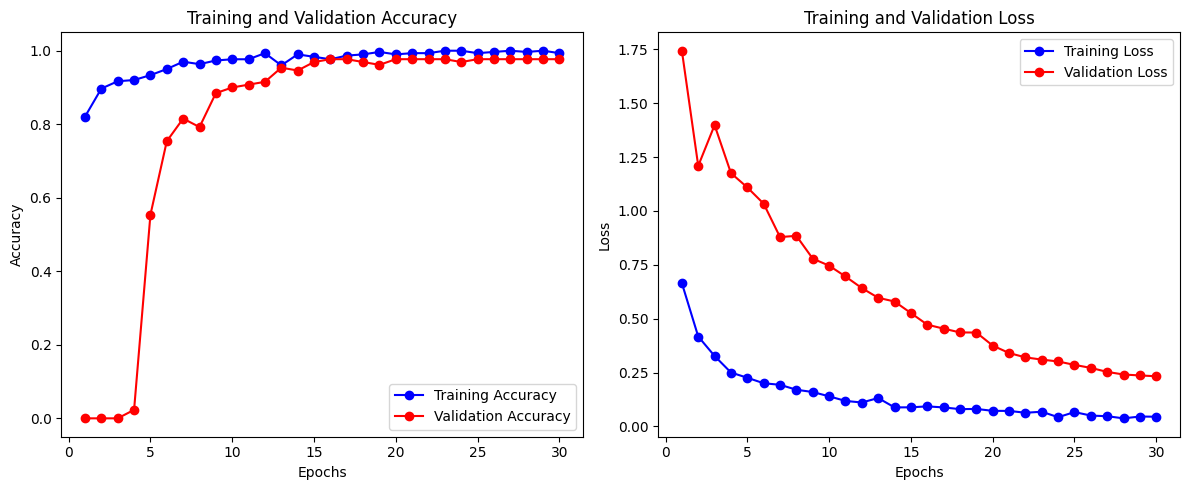

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Get training and validation accuracy and loss from the history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss per epoch
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# After training the model
history, sequence_model = run_experiment()
plot_training_history(history)


Here are two additional graphs that illustrate the model’s performance across training epochs:

1. **Training and Validation Accuracy**: This graph shows how the accuracy for both the training and validation sets evolved over the training period. Ideally, we aim for the validation accuracy to gradually approach the training accuracy, indicating good generalization.

2. **Training and Validation Loss**: This graph shows the change in training and validation loss across epochs. A decrease in loss for both sets generally indicates improved model performance. Notably, if the validation loss starts to diverge from the training loss, this may signal overfitting.

These graphs can serve as effective tools to discuss the model's learning behavior, convergence, and potential issues like overfitting in the results and conclusion sections of your thesis.

Here are some points you can include in your thesis to interpret and analyze the training output:

### 1. **Training and Validation Progression**
   - **Early Progress:** Initially, the training accuracy and loss demonstrate substantial improvement across epochs, indicating that the model is learning from the data and adjusting its weights effectively.
   - **Validation Performance:** The validation accuracy starts low, around 9%, and gradually increases to higher values, peaking near 86.4%. However, by the end of training, it fluctuates and settles around 59%.
   - **Loss Improvement:** The validation loss decreases steadily until epoch 13, with the lowest point reached at epoch 13 (val_loss: 0.7354), after which it does not improve, even though training continues to lower the training loss.

### 2. **Overfitting Indicators**
   - **Plateauing Validation Accuracy and Loss:** After a certain number of epochs (around epoch 13), the validation loss starts to increase, while the training accuracy continues to improve. This divergence suggests that the model may be overfitting, learning the specifics of the training data at the cost of generalizing well to the validation data.
   - **Early Stopping Point:** The best validation loss occurs around epoch 13, suggesting this could be a potential early stopping point to prevent overfitting.

### 3. **Model Saving Mechanism**
   - **Best Model Saving:** The model saves checkpoints based on validation loss improvement (seen with the “val_loss improved” messages). This helps preserve the best-performing model during training without requiring manual intervention.

### 4. **Test Performance**
   - **Test Accuracy:** The model achieves a test accuracy of 45.45% with a test loss of 0.9428. This is notably lower than the peak validation accuracy (86.4%), which suggests that the model may not be generalizing well to unseen data.
   - **Generalization Gap:** The discrepancy between validation and test accuracy may indicate the model has learned patterns specific to the training and validation sets rather than generalizable features, which could be due to the size or representativeness of the dataset.

### 5. **Future Optimization Strategies**
   - **Data Augmentation:** To address potential overfitting and improve generalization, consider augmenting the dataset with more varied samples.
   - **Regularization Techniques:** Implement techniques like dropout, weight decay, or data augmentation if not already applied.
   - **Cross-Validation:** Employing cross-validation could provide a more robust assessment of the model’s generalizability.
   - **Early Stopping:** Implement early stopping based on validation loss to halt training when overfitting begins, preserving the best model.

### 6. **Potential Limitations**
   - **Small Dataset Size or Imbalance:** If the dataset is small or imbalanced, the model might struggle to generalize well, as it could be overfitting to patterns in the training data.
   - **Architecture Constraints:** Depending on the complexity of the action sequences, the architecture (a CNN-RNN combination) may need further tuning, such as adding more layers, using alternative temporal aggregation techniques, or experimenting with different sequence lengths.

---

These notes help document the model’s behavior during training, highlight areas for potential improvement, and guide future experimentation or optimizations.

Investigating uncertainty measures can provide deeper insights into the model’s confidence, especially for action recognition tasks where predictions can be challenging. Here are a few approaches and visualizations you could use to evaluate uncertainty:

### 1. **Prediction Confidence Histogram**
   - **Purpose**: This histogram shows the confidence level (or probability) of the model’s predicted class for each test sample. If the model is uncertain, you may see a higher count of lower-confidence predictions (e.g., probabilities below a high threshold like 0.7).
   - **How to create**:
     - Use the model's `predict` function to obtain prediction probabilities.
     - Plot a histogram of the highest probability values for each prediction (the "confidence" for the predicted class).
   - **Interpretation**: Peaks at lower confidence values may indicate that the model is uncertain about many predictions. Peaks at high confidence levels suggest the model is certain about most predictions.

### 2. **Prediction Entropy**
   - **Purpose**: Entropy quantifies uncertainty by measuring the "spread" of prediction probabilities. Higher entropy suggests higher uncertainty, while lower entropy indicates more confident predictions.
   - **How to create**:
     - Calculate entropy for each prediction, using \( \text{Entropy} = -\sum p \log(p) \), where \( p \) represents each class probability for a sample.
     - Plot a histogram of entropy values.
   - **Interpretation**: If the model consistently assigns high entropy values, it may struggle with confident predictions for the data, implying that certain actions might be ambiguous.

### 3. **Confidence by Class**
   - **Purpose**: This bar plot shows the average confidence for each class, giving insight into which actions the model is more or less certain about.
   - **How to create**:
     - For each class, calculate the mean confidence (highest probability) of correct and incorrect predictions.
     - Plot the average confidence per class.
   - **Interpretation**: Lower average confidence for certain classes might indicate more challenging or overlapping actions, pointing to areas where model performance could be improved.

### 4. **Reliability Diagram (Calibration Curve)**
   - **Purpose**: This diagram compares confidence with accuracy to check if the model is well-calibrated (e.g., if predictions with 80% confidence are accurate around 80% of the time).
   - **How to create**:
     - Bin predictions by confidence intervals (e.g., 0.0–0.1, 0.1–0.2, etc.).
     - For each bin, calculate the accuracy of predictions.
     - Plot a line where accuracy matches confidence (perfect calibration).
   - **Interpretation**: A well-calibrated model will have points close to the diagonal. Deviations from the diagonal may indicate that the model is either overconfident or underconfident in its predictions.

Would you like help implementing these uncertainty measures, or do you have a specific one you'd like to start with?

To implement these uncertainty measures, let's go through each measure step by step in code.

For the following examples, we'll assume:

You have a trained model and a test dataset.
You’ll be able to get the prediction probabilities on the test set using model.predict.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



# Define your model architecture here (should be the same as used during training)
model = get_sequence_model()  # Replace create_model() with your actual model function

# Load the saved weights into the model
model.load_weights('/content/drive/My Drive/dataset/video_classifier.weights.h5')


model.save('/content/drive/My Drive/dataset/video_classifier.h5')


from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/video_classifier.h5')






/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1. Prediction Confidence Histogram

This histogram shows the highest confidence score for each prediction, representing how certain the model was for each sample.